#Case Study 02: Housing Price

Kamu akan melakukan proses EDA pada dataset "Housing Price", dengan menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, seperti zona lokasi, jumlah kamar tidur, ukuran tanah, dsb.

Tahap 1: Exploratory Data Analysis

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("/content/drive/MyDrive/train_house.csv", index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Cleaning Data - Drop variabel NaN

house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Memisahkan data menjadi numerikal & kategorikal

num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# Memisahkan data menjadi numerikal & kategorikal

house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


Tahap 2: 1D Visualization

Buatlah visualisasi bar chart dan jelaskan analisis dari variabel kategorikal berikut:

1. Utilities
2. HouseStyle
3. ExterQual

<Axes: xlabel='Utilities', ylabel='proportion'>

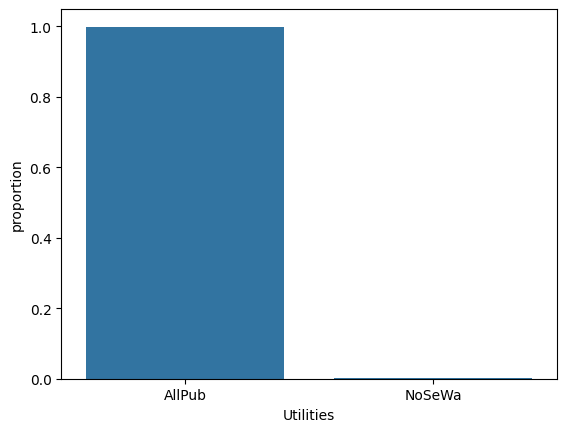

In [ ]:
sns.barplot(x=house_categorical["Utilities"].value_counts().index,
            y=house_categorical["Utilities"].value_counts(normalize = True))

Penjelasan: Utilities berisi informasi mengenai fasilitas pada AllPub atau All Public Utilities (E, G, W & S) sebesar 100 persen sedangkan No Sewa Electricity dan Gas Only tidak ada yang berminat

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

   1Story	One story
   
   1.5Fin	One and one-half story: 2nd level finished
  
   1.5Unf	One and one-half story: 2nd level unfinished
  
   2Story	Two story
   
   2.5Fin	Two and one-half story: 2nd level finished
  
   2.5Unf	Two and one-half story: 2nd level unfinished
  
   SFoyer	Split Foyer
   
   SLvl	Split Level

<Axes: xlabel='HouseStyle', ylabel='proportion'>

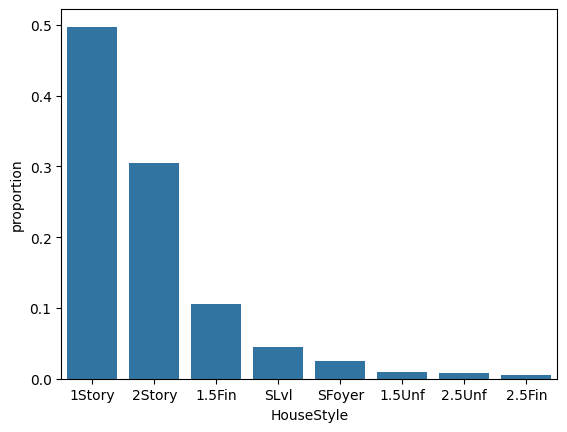

In [ ]:
sns.barplot(x=house_categorical["HouseStyle"].value_counts().index,
             y=house_categorical["HouseStyle"].value_counts(normalize = True))

HouseStyleseperti 1 lantai, 2 lantai, dst 1Story peminat paling banyak sekitar 50 % (One story) 1.5Fin peminat sekitar 10% One and one-half story: 2nd level finished 1.5Unf peminat sekitar 2%

ExterQual: Kualitas material eksterior Ex Excellent Gd Good TA Average/Typical Fa Fair

<Axes: xlabel='ExterQual', ylabel='proportion'>

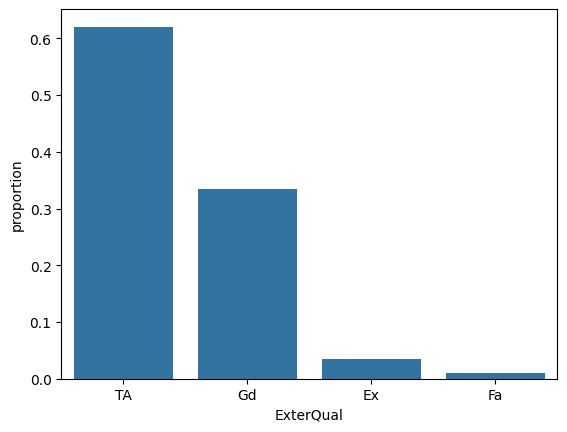

In [ ]:
sns.barplot(x=house_categorical["ExterQual"].value_counts().index,
            y=house_categorical["ExterQual"].value_counts(normalize = True))

ExterQual berisi informasi kualitas material eksterior

ExExcel lent peminat paling banyak sekitar 64%

Gd Good peminat sekitar 34%

TA Average/Typical peminat sekitar 8%

Fa Fair peminat paling sedikit sektar 2%

Buatlah visualisasi histogram dan jelaskan analisis dari variabel numerikal berikut:

1. SalePrice
2. GrLivArea
3. PoolArea

Lakukan pemrosesan data dengan transformasi log-10 untuk masing-masing variabel numerikal.

SalePrice

SalePrice merupakan variabel target yang ingin diprediksi. Secara fisik, ini berarti harga properti yang dijual

<ipython-input-10-5b40ae63f529>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median = 163000.0
Mean = 180921.19589041095
Std Dev = 79442.50288288662


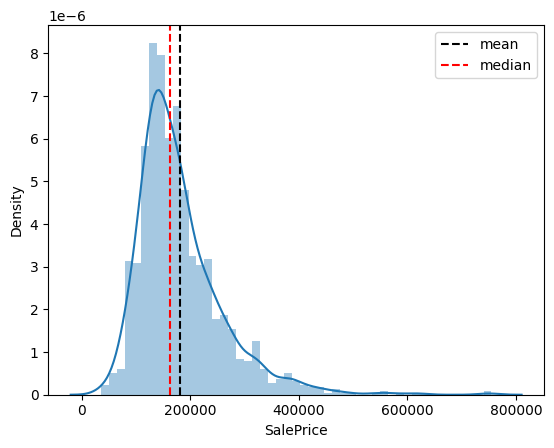

In [ ]:
x=house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Pada plot distribusi di atas, terlihat bahwa distribusi right-skewed. Kebanyakan data berada dalam range sekitar 100,000 sampai 300,000.

GrLivArea

GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement). Satuan yang digunakan adalah square feet

<ipython-input-11-e956e4af3c2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median = 1464.0
Mean = 1515.463698630137
Std Dev = 525.4803834232025


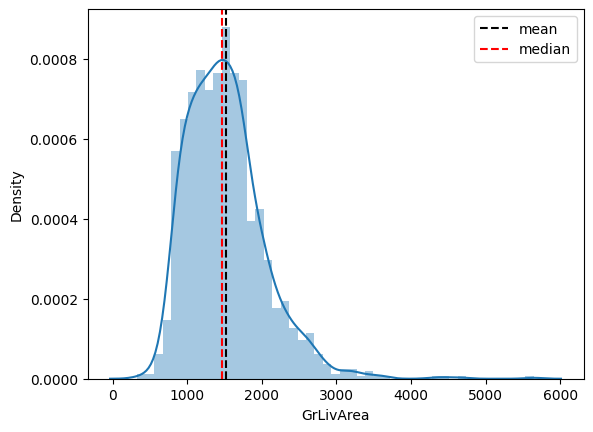

In [ ]:
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Di sini terlihat bahwa data kebanyakan ada di kisaran antara 1000-2000. Distribusinya skewed ke kiri

GarageArea

GarageArea berisi informasi mengenai luas garasi (jika ada). Satuan yang digunakan adalah square feet

<ipython-input-12-d565547f82a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median = 480.0
Mean = 472.9801369863014
Std Dev = 213.80484145338042


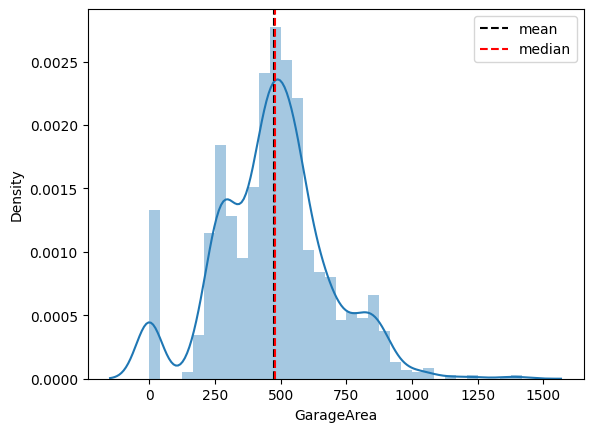

In [ ]:
x = house_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle ="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Terlihat pada plot distribusi di atas yang skewed ke kiri, kisaran nilai terbanyak ada di antara 450-550. Yang menarik, populasi di 0 juga relatif cukup besar, alias mereka yang tidak punya garasi.

# Pemrosesan Data Numerikal dengan transformasi Log-10



Sale Price

<ipython-input-13-c8e47f195ad6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median = 5.212187604403958
Mean = 5.221978956475628
Std Dev = 0.17347974217176834


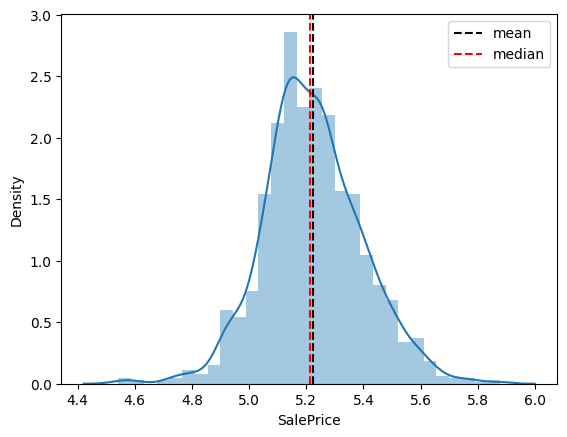

In [ ]:
x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Setelah transformasi logaritmik, distribusi Sale Price terlihat lebih di tengah, seimbang. Terlihat bahwa titik tertinggi ada di sekitar 5.1

GrLiv Area

<ipython-input-14-5cde23e1b74e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name, bins = 30)


Median = 3.165541076722373
Mean = 3.156354310389778
Std Dev = 0.14485910869663862


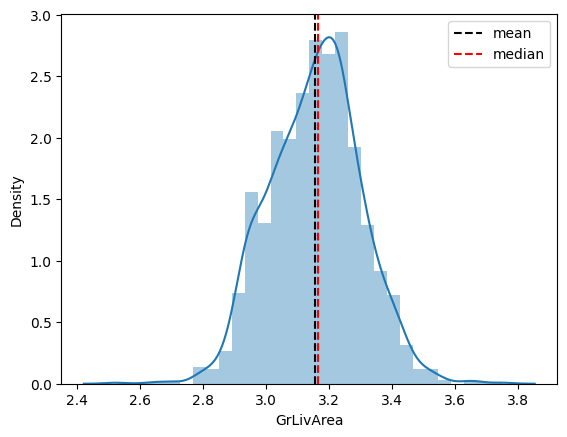

In [ ]:
x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel = x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle ="--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles= [line1, line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Setelah transformasi logaritmik, distribusi GrLiv Area terlihat lebih di tengah, seimbang. Terlihat bahwa titik tertinggi ada di sekitar 3.3

Garage Area

<ipython-input-15-4b7ce9b160cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name, bins = 30)


Median = 304.5
Mean = 291.2445141065831
Std Dev = 132.58242811392088


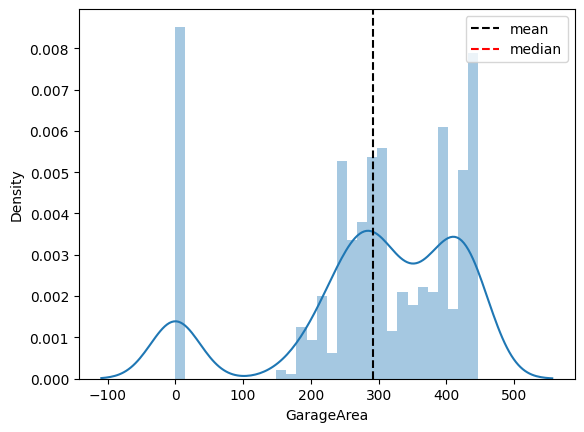

In [ ]:
x = house_numeric["GarageArea"] [house_numeric ["GarageArea"] < 450 ]
sns.distplot(x, axlabel = x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle ="--", label = "mean")
first_legend = plt.legend(handles = [line1, line2], loc=1)
print("Median =", x.median())
print("Mean =", x.mean())
print("Std Dev =", x.std())
plt.show()

Untuk Garage Area, terlihat untuk distribusinya masih skewed, kali ini skewed ke kanan. Titik terbanyak justru ada di titik 0, berarti banyak yang tidak memiliki garasi.

#Tahap 3: 2D Visualization
7. Buatlah visualisasi hubungan antara dataset:

  GrLivArea dengan SalePrice

  GarageArea dengan SalePrice

8. Lalu, buatlah analisis tentang hubungan antar-variabel tersebut!

GrLivArea dengan SalePrice

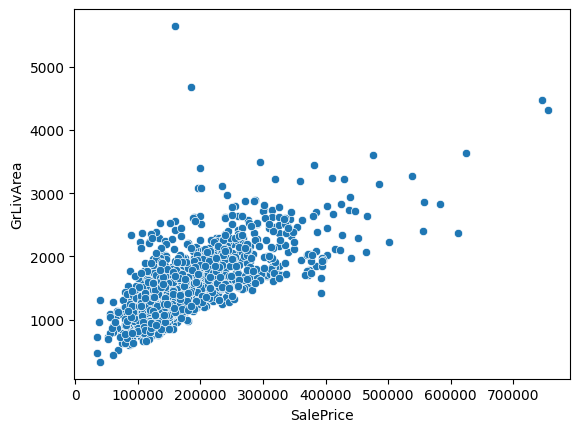

In [ ]:
ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()

GarageArea dengan SalePrice

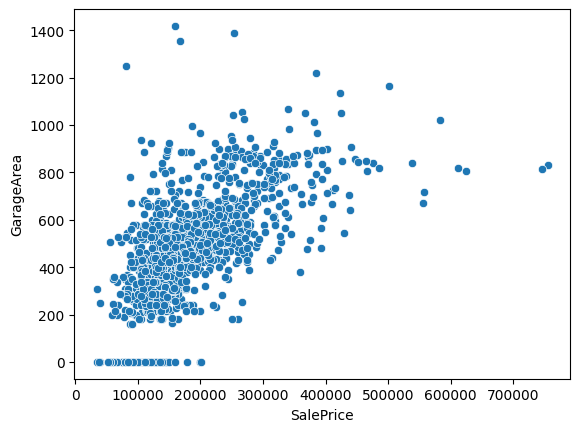

In [ ]:
ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

Analisis: terlihat bahwa baik hubungan antara GrLivArea dengan Sale Price dan juga GarageArea dengan SalePrice memiliki korelasi positif. Untuk nilai R^2 sendiri dari grafiknya terlihat bahwa korelasi GrLivArea lebih kuat terhadap SalePrice daripada GarageArea, terlihat dari persebaran titik data di grafik GrLivArea yang lebih rapat sebarannya daripada Garage Area.